In [2]:
%matplotlib inline

#import malariagen_data
import allel
import malariagen_data
import numpy as np
import pandas as pd
import seaborn as sns

# adding Folder_2 to the system path
#sys.path.insert(0, '/home/sanj/projects/gaardian/workflow/scripts/')
import probe as probe

### Karyotyping the GAARDIAN and Ag1000g data

In [3]:
ag3 = malariagen_data.Ag3(pre=True)

In [4]:

my_sample_set  = [
    # Ag1000G phase 3 Ghana sample set in Ag3.0
    "AG1000G-GH",
    # GAARD Ghana sample set in Ag3.2
    "1244-VO-GH-YAWSON-VMF00051",
    # Amenta-Etego sample sets in Ag3.3
    #'1190-VO-GH-AMENGA-ETEGO-VMF00013',
    #'1190-VO-GH-AMENGA-ETEGO-VMF00014',
    #'1190-VO-GH-AMENGA-ETEGO-VMF00028',
    #'1190-VO-GH-AMENGA-ETEGO-VMF00029',
    #'1190-VO-GH-AMENGA-ETEGO-VMF00046',
    #'1190-VO-GH-AMENGA-ETEGO-VMF00047',
    # GAARDIAN sample set in Ag3.4
    #'1244-VO-GH-YAWSON-VMF00149',
    'AG1000G-ML-A',
    'AG1000G-BF-A',
    'AG1000G-BF-B',
    'AG1000G-GN-A',
    'AG1000G-GN-B',
    '1245-VO-CI-CONSTANT-VMF00054',
    '1253-VO-TG-DJOGBENOU-VMF00052',
    '1237-VO-BJ-DJOGBENOU-VMF00050'
]


my_sample_set = '1244-VO-GH-YAWSON-VMF00149'



metadata = ag3.sample_metadata(sample_sets=my_sample_set)
snps = ag3.haplotypes(region='2L', sample_sets=my_sample_set, analysis='gamb_colu')
geno = allel.GenotypeDaskArray(snps['call_genotype'])

Load sample metadata:   0%|          | 0/1 [00:00<?, ?it/s]

/home/sanj/miniconda3/lib/python3.7/site-packages/dask/array/core.py:3187: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  "Passing an object to dask.array.from_array which is already a "


In [6]:
metadata['location2'] = metadata['location'].str.split(".").str.get(0)

In [23]:
targets = pd.read_csv("karyotype/2La_targets.txt", sep="\t", header=None)
pos2la = targets[0].to_list()
pos = allel.SortedIndex(snps['variant_position'])
pos_bool = pos.locate_intersection(pos2la)[0]
pos = pos[pos_bool]

In [15]:
geno = allel.GenotypeArray(geno.compress(pos_bool, axis=0))

In [19]:
sample_ids = np.repeat(snps['sample_id'].compute().values, 2, axis=0)

In [25]:
chrom = '2L'
inversion = '2La'

callset = {'geno':haps, 'pos':pos, 'chrom':chrom}
print(f"--- Running CompKaryo {inversion}--- ")
av_gts, total_sites, num_0, num_1, num_2 = probe.compkaryo(callset, inversion, haps=True)
total_sites = total_sites
df = pd.DataFrame({'partner_sample_id': sample_ids, 
                        'inversion':inversion, 
                        'mean_genotype': av_gts, 
                        'total_snp_tags':total_sites})


--- Running CompKaryo 2La--- 


In [26]:
df.to_csv("../../results/gaard_and_ag3.2la.karyo.tsv", sep="\t")

In [ ]:
pd.DataFrame({'partner_sample_id': metadata['sample_id'], 
                           'inversion':inversion, 
                           'mean_genotype': av_gts, 
                           'total_snp_tags':total_sites})

'2La'

In [1]:
invDict = {}

for inversion in ["2La"]:#probe.inversionDict.keys():
    print(inversion)
    chrom = probe.inversionDict[inversion][0]

    snps = ag3.haplotypes(region=chrom, sample_sets=my_sample_set, analysis='gamb_colu')
    


2La


NameError: name 'probe' is not defined

In [26]:
karyo = pd.DataFrame({'partner_sample_id': metadata['sample_id'], 
                           'inversion':inversion, 
                           'mean_genotype': av_gts, 
                           'total_snp_tags':total_sites})

In [29]:
karyo.to_csv("/home/sanj/ag1000g/ag3_karyotypes.tsv", sep="\t")

In [35]:
df = metadata[['sample_id', 'partner_sample_id', 'location2', 'species_gambiae_coluzzii']]
gaardian_karyotypes = pd.concat(invDict.values()).rename(columns={'partner_sample_id':'sample_id'})
gaardian_karyotypes = gaardian_karyotypes.merge(df).set_index('partner_sample_id').reset_index().drop(columns='sample_id')
gaardian_karyotypes.to_csv("gaardian_karyotypes.tsv", sep="\t") 

### Load karyo data

In [17]:
metadata = pd.read_csv("../../config/metadata.csv")

In [7]:
gaardian_karyotypes = pd.read_csv("../../results/karyotypes/gaardian_karyotypes.tsv", sep="\t", index_col=0)

In [8]:
gaardian_karyotypes

,partner_sample_id,inversion,mean_genotype,total_snp_tags,location2,species_gambiae_coluzzii
0,WA-2001,2La,0.000000,209,Adumanu,gambiae
1,WA-2001,2Rj,0.060606,99,Adumanu,gambiae
2,WA-2001,2Rb,0.123209,349,Adumanu,gambiae
3,WA-2001,2Rc_col,0.438596,57,Adumanu,gambiae
4,WA-2001,2Rc_gam,0.061224,49,Adumanu,gambiae
...,...,...,...,...,...,...
3390,WA-2500,2Rb,0.086207,348,Domenase,coluzzii
3391,WA-2500,2Rc_col,0.122807,57,Domenase,coluzzii
3392,WA-2500,2Rc_gam,0.020408,49,Domenase,coluzzii
3393,WA-2500,2Rd,0.081633,147,Domenase,coluzzii


In [9]:
def get_karyotype_freq(dfpath, inversion, species, metadata):
    
    karyotypes = pd.read_csv(dfpath, sep="\t", index_col=0)
    karyo = karyotypes.loc[(karyotypes['species_gambiae_coluzzii'] == species) & (karyotypes['inversion'] == inversion)]
    karyo['karyotype']  = karyo.mean_genotype.round()
    
    df = pd.DataFrame(karyo.groupby(['inversion', 'location2']).karyotype.value_counts()).rename(columns={'karyotype':'n'}).reset_index()
    df['total_alleles'] = df['karyotype']*df['n']
    df = df.groupby('location2').agg({'n':'sum', 'total_alleles':'sum'})
    df[f'{inversion}_frequency'] = df['total_alleles']/(df['n']*2)
    df = df.drop(columns=['total_alleles']).reset_index()

    metalocs = metadata[['location2', 'latitude', 'longitude']].groupby('location2').agg({'latitude':'mean', 'longitude':'mean'}).reset_index()

    
    karyo_meta = pd.merge(df, metalocs)
    return karyo_meta
    

In [10]:
df2la = get_karyotype_freq("../../results/karyotypes/gaardian_karyotypes.tsv", "2La", "coluzzii", metadata)
df2rb = get_karyotype_freq("../../results/karyotypes/gaardian_karyotypes.tsv", "2Rb", "coluzzii", metadata)

/home/sanj/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [11]:
df = df2la.merge(df2rb).query("n > 5").drop(columns=['latitude', 'longitude', 'n']).set_index('location2')

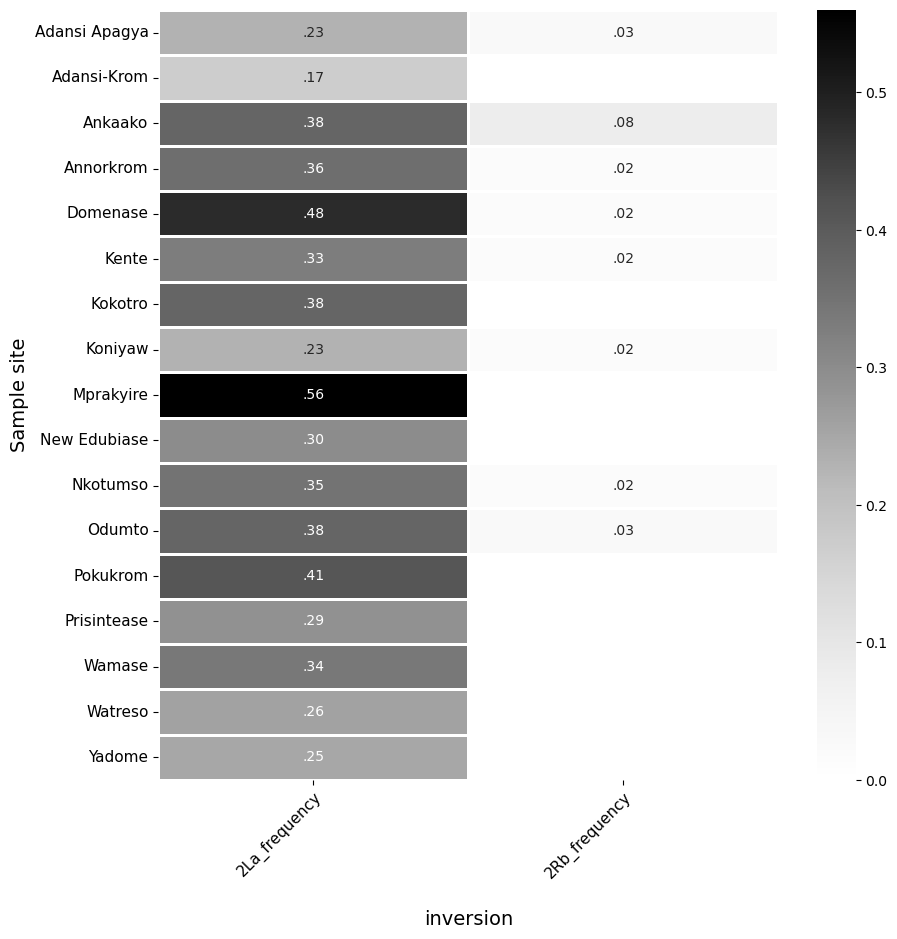

In [19]:
probe.plotRectangular(df.round(2), cmap="Greys", path="inv.freqs.gaardian.png", ylab='Sample site', xlab='inversion')